## **Provide Insights to Chief Operations in Transportation Domain**

- **Domain** :- Transportation & Mobilty
- **Fuctions** :- Operatins

#### **Problem Statements** 



Goodcabs, a cab service company established two years ago, has gained a strong foothold in the Indian market by focusing on tier-2 cities. Unlike other cab service providers, Goodcabs is committed to supporting local drivers, helping them make a sustainable living in their hometowns while ensuring excellent service to passengers. With operations in ten tier-2 cities across India, Goodcabs has set ambitious performance targets for 2024 to drive growth and improve passenger satisfaction. 

#### **Project Goals**

The analysis is centered around growing trip volumes, passenger satisfaction, and repeat bookings for Goodcabs. Through the determination of important trends and operational optimization, overall performance is aimed to be enhanced. These findings will assist Goodcabs in reaching its customer retention and growth goals.

#### **Data Overview**


![ED Diagram](ERD.png)

##### Import Necessary Library 

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

##### Load the Data

In [14]:
city_target = pd.read_csv('city_target_passenger_rating.csv')
city_target.head(5)

,city_id,target_avg_passenger_rating
0,CH01,8.00
1,UP01,7.25
2,AP01,8.50
3,MP01,8.00
4,RJ01,8.25


In [15]:
dim_city = pd.read_csv('dim_city.csv')
dim_city.head(5)

,city_id,city_name
0,RJ01,Jaipur
1,UP01,Lucknow
2,GJ01,Surat
3,KL01,Kochi
4,MP01,Indore


In [16]:
dim_date = pd.read_csv('dim_date.csv',parse_dates=['date','start_of_month'])
dim_date.head(5)

,date,start_of_month,month_name,day_type
0,2024-01-01,2024-01-01,January,Weekday
1,2024-01-02,2024-01-01,January,Weekday
2,2024-01-03,2024-01-01,January,Weekday
3,2024-01-04,2024-01-01,January,Weekday
4,2024-01-05,2024-01-01,January,Weekday


In [17]:
dim_repeat_trip = pd.read_csv('dim_repeat_trip_distribution.csv', parse_dates=['month'])
dim_repeat_trip.head(5)

,month,city_id,trip_count,repeat_passenger_count
0,2024-01-01,AP01,10-Trips,7
1,2024-01-01,AP01,2-Trips,352
2,2024-01-01,AP01,3-Trips,158
3,2024-01-01,AP01,4-Trips,53
4,2024-01-01,AP01,5-Trips,38


In [18]:
fact_passenger = pd.read_csv('fact_passenger_summary.csv', parse_dates=['month'])
fact_passenger.head(5)

,month,city_id,new_passengers,repeat_passengers,total_passengers
0,2024-01-01,AP01,2513,650,3163
1,2024-01-01,CH01,3920,720,4640
2,2024-01-01,GJ01,2432,1184,3616
3,2024-01-01,GJ02,2089,544,2633
4,2024-01-01,KA01,1957,172,2129


In [19]:
fact_trips = pd.read_csv('fact_trips.csv', parse_dates=['date'])
fact_trips.head(5)

,trip_id,date,city_id,passenger_type,distance_travelled_km,fare_amount,passenger_rating,driver_rating
0,TRPLUC240113d55de2fb,2024-01-13,UP01,repeated,11,158,5,5
1,TRPVAD240129a3b6dba8,2024-01-29,GJ02,repeated,7,74,5,5
2,TRPCOI240107a42430fb,2024-01-07,TN01,repeated,11,155,8,8
3,TRPKOC240325d7601389,2024-03-25,KL01,repeated,36,427,9,10
4,TRPVIS2406027be97166,2024-06-02,AP01,new,17,265,8,8


In [20]:
monthly_target = pd.read_csv('monthly_target_new_passengers.csv', parse_dates=['month'])
monthly_target.head(5)

,month,city_id,target_new_passengers
0,2024-05-01,GJ01,1500
1,2024-05-01,GJ02,1500
2,2024-03-01,GJ01,2000
3,2024-05-01,UP01,2000
4,2024-05-01,MP01,2000


In [21]:
monthly_target_trips = pd.read_csv('monthly_target_trips.csv', parse_dates=['month'])
monthly_target_trips.head(5)

,month,city_id,total_target_trips
0,2024-03-01,MP01,7000
1,2024-05-01,KA01,2500
2,2024-04-01,UP01,11000
3,2024-02-01,GJ02,6000
4,2024-05-01,KL01,9000


#### EDA 

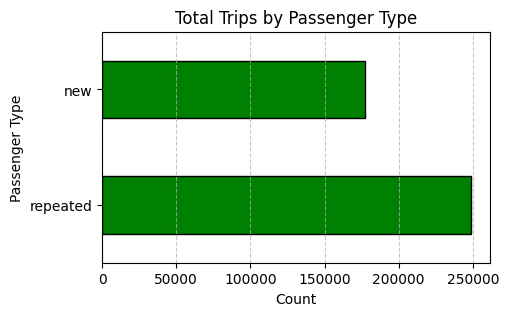

In [22]:
ax = fact_trips['passenger_type'].value_counts().plot(
    kind='barh', 
    figsize=(5,3),  
    edgecolor='black', 
    color='Green'  
)

ax.set_title("Total Trips by Passenger Type")
ax.set_xlabel("Count")
ax.set_ylabel("Passenger Type")
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

##### Monthly Trends of Total Trips Across Cities

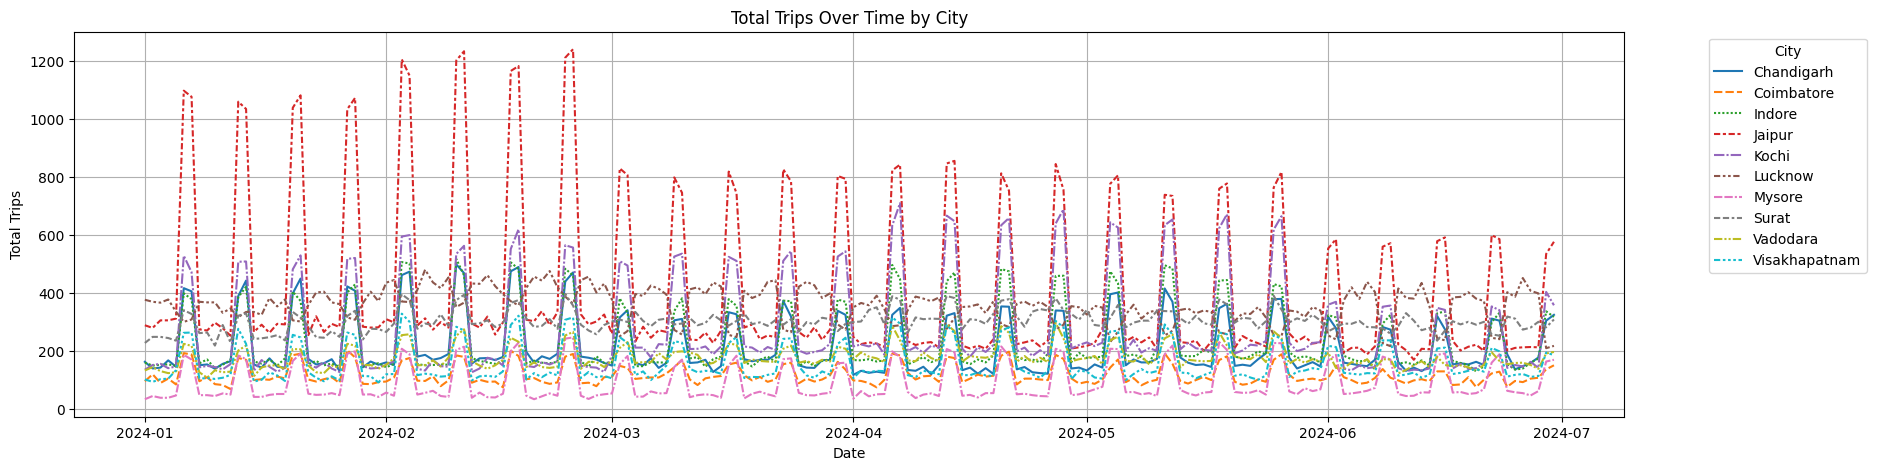

In [30]:
monthly_city = fact_trips.merge(dim_city, on='city_id', how='left')

monthly_data = monthly_city.pivot_table(values='trip_id', index='date', columns='city_name', aggfunc='count').fillna(0)
monthly_data = monthly_data.sort_index()

plt.figure(figsize=(20, 5))
sns.lineplot(data=monthly_data)

plt.title('Total Trips Over Time by City')
plt.ylabel('Total Trips')
plt.xlabel('Date')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### Monthly Summary

In [72]:
monthly_summary = fact_trips.groupby(fact_trips['date'].dt.to_period('M').rename('month')).agg(
    total_trips=('trip_id','count'),
    total_revenue=('fare_amount', 'sum'),
    avg_passenger_rating=('passenger_rating', 'mean'),
    avg_driver_rating=('driver_rating', 'mean')
).round(2)

# Extract year and month from the date index if not already done
monthly_summary['year'] = monthly_summary.index.year
monthly_summary['month'] = monthly_summary.index.strftime('%B') 

In [73]:
monthly_summary

,total_trips,total_revenue,avg_passenger_rating,avg_driver_rating,year,month
month,,,,,,
2024-01,70462,18454142,7.82,7.89,2024,January
2024-02,75379,19859356,7.75,7.86,2024,February
2024-03,73679,18836382,7.67,7.85,2024,March
2024-04,71335,17695759,7.60,7.81,2024,April
2024-05,72543,17985168,7.57,7.82,2024,May
2024-06,62505,15357284,7.54,7.75,2024,June
